# Lab 3: Bayes Classifier and Boosting



### 1. 算法原理


### 1. 贝叶斯定理基础
$$
P(k|\mathbf{x}) = \frac{P(\mathbf{x}|k)P(k)}{P(\mathbf{x})}
$$

- $P(k|\mathbf{x})$: 后验概率（给定特征$\mathbf{x}$时属于类别$k$的概率）
- $P(\mathbf{x}|k)$: 类条件概率（似然）
- $P(k)$: 先验概率
- $P(\mathbf{x})$: 证据因子（归一化常数）

### 2. 高斯分布假设

#### 单变量高斯分布
$$
p(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

#### 多变量高斯分布（对角协方差）
$$
p(\mathbf{x}|\mu,\Sigma) = \prod_{j=1}^d \frac{1}{\sqrt{2\pi\sigma_j^2}}\exp\left(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2}\right)
$$

### 3. 参数估计公式

#### 均值估计（最大似然）
$$
\mu_k = \frac{1}{N_k}\sum_{i\in C_k}\mathbf{x}_i
$$

#### 方差估计（对角元素）
$$
\sigma_{k,j}^2 = \frac{1}{N_k}\sum_{i\in C_k}(x_{i,j}-\mu_{k,j})^2
$$

### 4. 对数后验概率计算
$$
\log P(k|\mathbf{x}) \propto -\frac{1}{2}\sum_{j=1}^d \left[ \underbrace{\log\sigma_{k,j}^2}_{\text{对数方差项}} + \underbrace{\frac{(x_j-\mu_{k,j})^2}{\sigma_{k,j}^2}}_{\text{标准化距离项}} \right] + \underbrace{\log p(k)}_{\text{先验项}}
$$

### 5. 决策规则
$$
\hat{y} = \arg\max_k \log P(k|\mathbf{x})
$$

### 公式说明要点
1. 协方差矩阵$\Sigma$仅保留对角线元素（朴素假设）
2. 实际计算使用对数概率避免数值下溢
3. 马氏距离项$(x-\mu)^T\Sigma^{-1}(x-\mu)$简化为各维度平方和
4. 先验概率$p(k)$通过训练集类别频率估计


In [1]:

def computePrior(labels, W=None):
    """
    计算各类别的先验概率（数据集中各类别占比）
    输入: 
        labels - 样本标签向量 (N×1)
        W - 样本权重（默认等权重）
    输出:
        prior - 各类别先验概率向量 (C×1)
    """
    # 实现逻辑：
    # 1. 统计每个类别的样本数
    # 2. 计算各类别频率作为先验概率
def mlParams(X, labels, W=None):
    """
    计算各类别的高斯分布参数（均值与协方差）
    输入:
        X - 特征矩阵 (N×d)
        labels - 样本标签 (N×1)
    输出:
        mu - 各类别均值矩阵 (C×d)
        sigma - 各类别协方差矩阵 (C×d×d)
    """
    # 实现逻辑：
    # 1. 对每个类别分别计算：
    #   - 均值向量 μ = mean(X_class)
    #   - 协方差矩阵 Σ = diag(var(X_class)) 
    # 2. 朴素贝叶斯假设：协方差矩阵仅保留对角线元素
def classifyBayes(X, prior, mu, sigma):
    """
    基于贝叶斯决策规则进行分类预测
    输入:
        X - 测试样本 (N×d)
        prior - 先验概率向量 (C×1)
        mu - 各类别均值矩阵 (C×d)
        sigma - 各类别协方差矩阵 (C×d×d)
    输出:
        h - 预测类别标签 (N×1)
    """
    # 实现逻辑：
    # 1. 对每个测试样本计算：
    #   log后验 = log高斯似然 + log先验
    # 2. 高斯似然计算：
    #   - 使用对角协方差矩阵简化计算
    #   - 包含对数行列式和马氏距离项
    # 3. 选择最大后验对应的类别

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [2]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *

C:\Users\Parsifal\AppData\Local\Temp\ipykernel_14384\3592221499.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [3]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    # ==========================

    for i, c in enumerate(classes):
        prior[i] = np.sum(labels == c) / Npts  # 计算类别 c 的频率
    
    # ==========================

    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    for i, c in enumerate(classes):
        class_mask = (labels == c)  # 获取属于类别 c 的样本索引
        X_class = X[class_mask]  # 提取该类别的样本
        W_class = W[class_mask]  # 提取对应的样本权重

        # 计算加权均值mu
        mu[i] = np.sum(W_class * X_class, axis=0) / np.sum(W_class)

    # 计算协方差sigma（只计算对角元素）
    for i, c in enumerate(classes):
        class_mask = (labels == c)
        X_class = X[class_mask]
        W_class = W[class_mask]

        # 计算加权协方差（只计算对角元素）
        sigma_diag = np.sum(W_class * (X_class - mu[i]) ** 2, axis=0) / np.sum(W_class)
        sigma[i] = np.diag(sigma_diag)  # 只保留对角元素，假设特征独立
    # ==========================

    return mu, sigma

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for i in range(Nclasses):
        # 计算对数先验概率
        logPrior = np.log(prior[i])

        # 计算对数似然概率
        diag_sigma = np.diag(sigma[i])  # 取出对角线元素
        logLikelihood = -0.5 * np.sum(np.log(diag_sigma))  # log(|Σ|)
        logLikelihood -= 0.5 * np.sum(((X - mu[i]) ** 2) / diag_sigma, axis=1)  # 计算二次项
        
        # 计算后验概率（去掉归一化项）
        logProb[i, :] = logLikelihood + logPrior
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

In [4]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

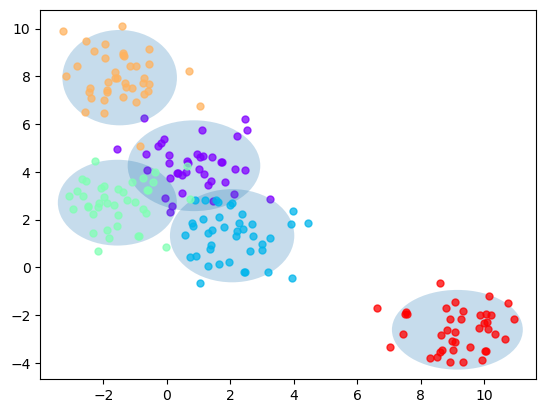

In [5]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels)
plotGaussian(X,labels,mu,sigma) #把数据分布可视化为椭圆

Call the `testClassifier` and `plotBoundary` functions for this part.

In [6]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [7]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


d:\python\2025spring\dd2421\lab3py\labfuns.py:255: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
d:\python\2025spring\dd2421\lab3py\labfuns.py:256: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClIdx,1],marker='*',c=color,s=50,alpha=0.8, label="Class "+str(c)+" Test")


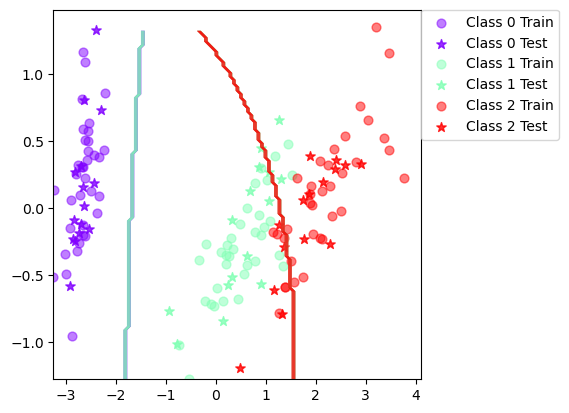

In [8]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)